# Instructions

Answer the questions and perform any additional analysis you think will help you understand what's going on in the data. You will be required to present your work, you can use this notebook or create slides based on your analysis. Whatever you’re comfortable with is fine with us.

The section headings below are only a guide and this notebook should be modified as you see fit.

# 1. Data processing

In [ ]:
"""
Introduction

In 2014-2015 we collected health and demographic data which can use to analyse different factors such as 
income, literacy ,standards of living, etc, across different countries and regions. The data gives rise
to assumptions on which countries have higher standards of living and which are still developing. 
It is also good practice to look into how these factors are related and further provide platform
to make decisions and bring improvements in developing countries. 
"""

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

data_frame= pd.read_csv('data.csv')
print(data_frame)

                                Country                 Region  Population  \
0                           Afghanistan  Eastern Mediterranean       29825   
1                               Albania                 Europe        3162   
2                               Algeria                 Africa       38482   
3                               Andorra                 Europe          78   
4                                Angola                 Africa       20821   
..                                  ...                    ...         ...   
189  Venezuela (Bolivarian Republic of)               Americas       29955   
190                            Viet Nam        Western Pacific       90796   
191                               Yemen  Eastern Mediterranean       23852   
192                              Zambia                 Africa       14075   
193                            Zimbabwe                 Africa       13724   

     Under15  Over60  FertilityRate  LifeExpectancy  ChildMorta

In [4]:
#Question 1
print(data_frame.isnull().sum())              #check for number of missing values

Country                           0
Region                            0
Population                        0
Under15                           0
Over60                            0
FertilityRate                    11
LifeExpectancy                    0
ChildMortality                    0
CellularSubscribers              10
LiteracyRate                     91
GNI                              32
PrimarySchoolEnrollmentMale      93
PrimarySchoolEnrollmentFemale    93
dtype: int64


In [28]:
"""
In the below codes,null values were replaced with median of each column. This solves the problem
of null values in the data while ensuring no data is lost. Also, median is used to avoid any outliers 
that will distort the conclusions to be obtained from data.

This decision is the best in this case because some columns which will be needed in the analysis have
a huge number of null values, which will lead to huge data loss if these columns/rows were deleted,
hence it better to insert a relevant value

"""

fertilitymedian=data_frame["FertilityRate"].median()
data_frame["FertilityRate"]=data_frame["FertilityRate"].fillna(fertilitymedian)


cellularsubscribersmedian= data_frame["CellularSubscribers"].median()
data_frame["CellularSubscribers"]=data_frame["CellularSubscribers"].fillna(cellularsubscribersmedian)


literacyratemedian=data_frame["LiteracyRate"].median()
data_frame["LiteracyRate"]=data_frame["LiteracyRate"].fillna(literacyratemedian)


gnimedian=data_frame["GNI"].median()
data_frame["GNI"]=data_frame["GNI"].fillna(gnimedian)


psenrollmalemed=data_frame["PrimarySchoolEnrollmentMale"].median()
data_frame["PrimarySchoolEnrollmentMale"]=data_frame["PrimarySchoolEnrollmentMale"].fillna(psenrollmalemed)


psenrollfemalemed=data_frame["PrimarySchoolEnrollmentFemale"].median()
data_frame["PrimarySchoolEnrollmentFemale"]=data_frame["PrimarySchoolEnrollmentFemale"].fillna(psenrollfemalemed)


print(data_frame)

                                Country                 Region  Population  \
0                           Afghanistan  Eastern Mediterranean       29825   
1                               Albania                 Europe        3162   
2                               Algeria                 Africa       38482   
3                               Andorra                 Europe          78   
4                                Angola                 Africa       20821   
..                                  ...                    ...         ...   
189  Venezuela (Bolivarian Republic of)               Americas       29955   
190                            Viet Nam        Western Pacific       90796   
191                               Yemen  Eastern Mediterranean       23852   
192                              Zambia                 Africa       14075   
193                            Zimbabwe                 Africa       13724   

     Under15  Over60  FertilityRate  LifeExpectancy  ChildMorta

In [23]:
print(data_frame.isnull().sum())      #to check if there are still missing values

Country                          0
Region                           0
Population                       0
Under15                          0
Over60                           0
FertilityRate                    0
LifeExpectancy                   0
ChildMortality                   0
CellularSubscribers              0
LiteracyRate                     0
GNI                              0
PrimarySchoolEnrollmentMale      0
PrimarySchoolEnrollmentFemale    0
dtype: int64


In [27]:
#Question 2
"""
checked if there are any other problems in the data such as duplicated values. In this case there are
no duplicated values in the dataset.
 
"""
print (data_frame.duplicated().sum())

0


# 2. Exploratory data analysis

In [47]:
#Question 3

"""
Japan is the country with the lowest % of their population under 15.
Niger is the country with the highest % of ther popultion under 15.

"""
lowestpopulation = data_frame["Under15"].min()
country_pop_lowest_under15 = data_frame[data_frame.Under15 == lowestpopulation] 


highestpopulation = data_frame["Under15"].max()
country_pop_highest_under15 = data_frame[data_frame.Under15 == highestpopulation]


print (country_pop_lowest_under15)
print (country_pop_highest_under15)

   Country           Region  Population  Under15  Over60  FertilityRate  \
85   Japan  Western Pacific      127000    13.12   31.92           1.39   

    LifeExpectancy  ChildMortality  CellularSubscribers  LiteracyRate  \
85              83             3.0               104.95          91.8   

        GNI  PrimarySchoolEnrollmentMale  PrimarySchoolEnrollmentFemale  
85  35330.0                         94.7                           95.1  
    Country  Region  Population  Under15  Over60  FertilityRate  \
123   Niger  Africa       17157    49.99    4.26           7.58   

     LifeExpectancy  ChildMortality  CellularSubscribers  LiteracyRate    GNI  \
123              56           113.5                29.52          91.8  720.0   

     PrimarySchoolEnrollmentMale  PrimarySchoolEnrollmentFemale  
123                         64.2                           52.0  


In [50]:
#Question 4

""" Western Pacific is the region with the highest % of their population over 60"""

highest_over60 = data_frame["Over60"].max()

region_highest_over60 = data_frame[data_frame.Over60 == highest_over60]

print (region_highest_over60)

   Country           Region  Population  Under15  Over60  FertilityRate  \
85   Japan  Western Pacific      127000    13.12   31.92           1.39   

    LifeExpectancy  ChildMortality  CellularSubscribers  LiteracyRate  \
85              83             3.0               104.95          91.8   

        GNI  PrimarySchoolEnrollmentMale  PrimarySchoolEnrollmentFemale  
85  35330.0                         94.7                           95.1  


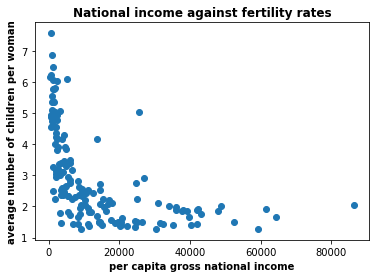

In [44]:
#Question 5

"""
The fertility rates decreases as the income increases and there are few countries which do not 
follow this relation. They are evident by the outliers appearing in the scatter plot.

"""

plt.scatter(data_frame.GNI, data_frame.FertilityRate)
plt.xlabel("per capita gross national income", fontweight="bold")
plt.ylabel("average number of children per woman", fontweight="bold")
plt.title("National income against fertility rates", fontweight="bold")
plt.show()


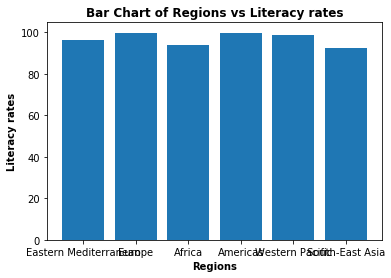

In [72]:
#Question 6

"""
Africa and East Asia seem to be the regions that have lowest literacy rates even though
these rates are almost equal, due to a lot of null values in the literacyrate column being
inserted with a median value.

"""
plt.bar(data_frame.Region, data_frame.LiteracyRate)

plt.xlabel("Regions", fontweight="bold")
plt.ylabel("Literacy rates", fontweight="bold")
plt.title("Bar Chart of Regions vs Literacy rates", fontweight="bold")

plt.show()

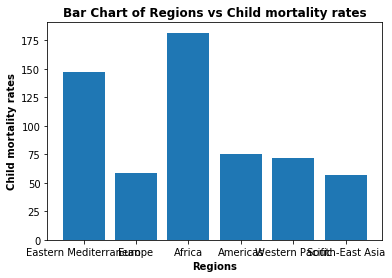

In [73]:
#Question 7

"""
Europe, America, Western Pacific and East Asia are the regions with the lowest child mortality rates.

"""

plt.bar(data_frame.Region, data_frame.ChildMortality)

plt.xlabel("Regions", fontweight="bold")
plt.ylabel("Child mortality rates", fontweight="bold")
plt.title("Bar Chart of Regions vs Child mortality rates", fontweight="bold")

plt.show()


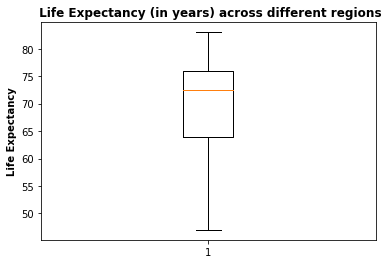

In [97]:
#Question 8

"""
More than 50% of populations across regions have a life expectancy less than or equal to approximately
70 years. About 25% of populations across regions have a life expectancy less than or equal to 
approximately 65 years. The minimum life expectancy is approximately 50 years and the maximum is 
approximately 80 years.

"""

plt.boxplot(data_frame["LifeExpectancy"])
plt.title(" Life Expectancy (in years) across different regions" , fontweight="bold" )
plt.ylabel("Life Expectancy" , fontweight="bold")
plt.show()

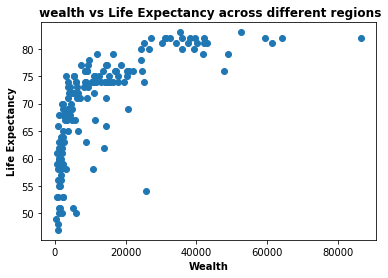

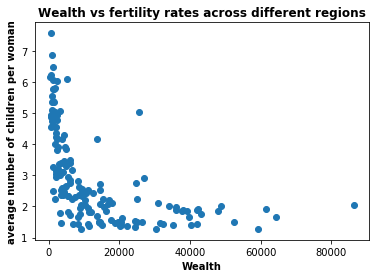

In [50]:
#Question 9

"""
As wealth increases the life expectancy across regions also increases. However in African countries
as the wealth decreases, the life expectancy increases.

As the wealth increases, fertility rates across regions decreases. This relationship hold for African
countries

"""

plt.scatter(data_frame.GNI, data_frame.LifeExpectancy)

plt.xlabel("Wealth", fontweight="bold")
plt.ylabel("Life Expectancy", fontweight="bold")
plt.title(" wealth vs Life Expectancy across different regions", fontweight="bold")

plt.show()

plt.scatter(data_frame.GNI, data_frame.FertilityRate)

plt.xlabel("Wealth", fontweight="bold")
plt.ylabel("average number of children per woman", fontweight="bold")
plt.title("Wealth vs fertility rates across different regions", fontweight="bold")

plt.show()


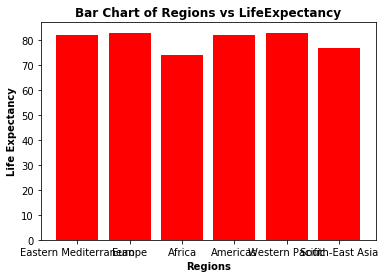

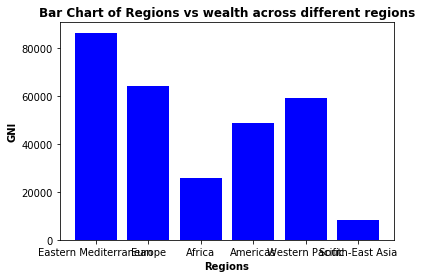

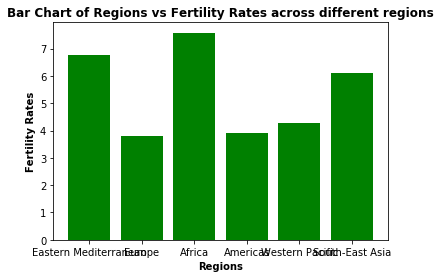

In [49]:
plt.bar(data_frame.Region, data_frame.LifeExpectancy, color='r')
plt.title("Bar Chart of Regions vs LifeExpectancy", fontweight="bold")
plt.xlabel("Regions", fontweight='bold')
plt.ylabel("Life Expectancy", fontweight='bold')
plt.show()

plt.bar(data_frame.Region, data_frame.GNI, color='b')
plt.title("Bar Chart of Regions vs wealth across different regions", fontweight="bold")
plt.xlabel("Regions", fontweight='bold')
plt.ylabel("GNI", fontweight='bold')
plt.show()

plt.bar(data_frame.Region, data_frame.FertilityRate, color='green')
plt.title("Bar Chart of Regions vs Fertility Rates across different regions", fontweight="bold")
plt.xlabel("Regions", fontweight='bold')
plt.ylabel("Fertility Rates", fontweight='bold')
plt.show()

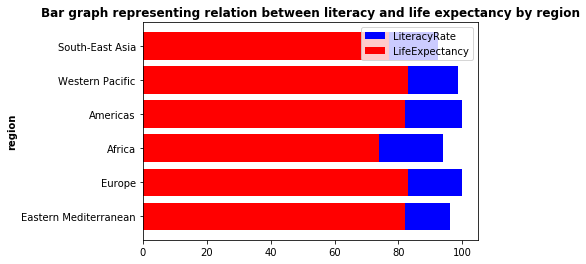

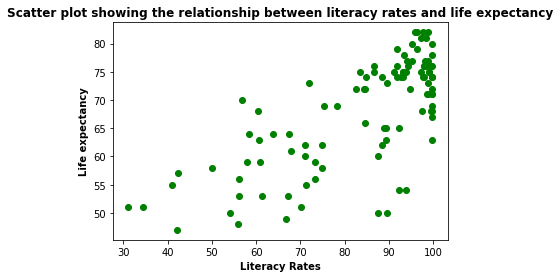

In [37]:
#Question 10

"""
 The life expectancy increase across regions as the literacy rates increases.African countries have the
 lowest literacy rates and also have shorter life expectancy.
 However we cannot be fully confident in the relationships represented here, because the information
 for literacy rates was manipulated during data processing and can only provide approximations 
 and not accurate information. 

"""

plt.barh(data_frame.Region , data_frame.LiteracyRate, label='LiteracyRate', color='b')
plt.barh(data_frame.Region , data_frame.LifeExpectancy, label='LifeExpectancy', color='r')
plt.title('Bar graph representing relation between literacy and life expectancy by region', fontweight='bold')
plt.ylabel('region', fontweight='bold')
plt.legend()
plt.show()

plt.scatter(data_frame.LiteracyRate, data_frame.LifeExpectancy, color='green')
plt.title('Scatter plot showing the relationship between literacy rates and life expectancy',fontweight='bold')
plt.xlabel('Literacy Rates', fontweight='bold')
plt.ylabel('Life expectancy', fontweight='bold')
plt.show()


# 3. Conclusion and insights 

In [ ]:
"""
After further exploring and analysing the health and demographic data collected, we came up with 
useful conclusions and assumptions to be further tested below:

1. It appears that the populations in African countries are composed of mostly youth than other countries
such as japan who have more adults.

2. In most countries, when the income levels increases, the fertility rates decreases. This means 
women with more income tend to have less number of children than those who earn less income.

3. North regions including South America seem to have higher literacy rates than the sourthen regions.

4.Africa and Eastern Mediterranean regions have higher child mortality rates than the rest of the 
regions which might be due to their high fertility rates as well as their populations being mostly
composed of youth than adults.

5.Africa also have lower life expectancy than other regions hence the statistics show that African countries
have more yough people than adults, hence their high fertility rates and high child mortality rates.

6. In regions such as Africa and South Asia have the lowest wealth, and also the lowest life expectancy,
hence it seems like wealth does contribute to increasing life expectancy of populations. Also most 
regions with lowest wealth have highest fertility rates except for Eastern Mediterannean regions which 
shows that when their wealth increases, their fertility rates also increases. 

7.Regions with lower life expectancy have lower literacy rates, hence it shows that literacy rates 
do affect the life expectancy of populations. The higher the literacy rates, the higher the life expectancy
. African countries have the lowest literacy rates, hence the lowest life expectancy. 
"""